<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 2: *Statistics, Matplotlib, Seaborn***

###**Tenggat Waktu: 25 Febuari 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab2_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **25 Febuari 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = "IQBAL PAHLEVI AMIN"
KELAS = "KASDD - B"
NPM = "2106752281"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = ['2106750742']

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ['seaborn.pydata.org', 'https://pandas.pydata.org/', 'geeksforgeeks']

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, IQBAL PAHLEVI AMIN dari kelas KASDD - B dengan NPM 2106752281, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (IQBAL PAHLEVI AMIN)


# Materi (Exploratory Data Analysis)

*Exploratory Data Analysis* (EDA) merupakan suatu proses menganalisis dataset untuk melihat karakteristik utama dari data. EDA adalah pemrosesan dasar yang dapat mempengaruhi keputusan-keputusan seorang data scientist dalam memproses data di tahap selanjutnya. Proses ini sering melibatkan dua hal, di antaranya *descriptive statistics* dan data *visualization*.

## Deskripsi Dataset "Top 500 FIFA Mens Football Players"

Tabel di bawah menunjukkan data 500 pemain sepakbola terbaik di dunia menurut FIFA, per 2020. Setiap pemain sepakbola diberi angka rating dengan rentang 0 sampai 100 yang menunjukan tingkat kemampuan atlet tersebut dalam bermain sepakbola. Angka rating ini diberi oleh FIFA dengan mempertimbangkan performa atlet tersebut dalam semua pertandingan resmi yang dia ikuti.

* `Name`: Nama dari pemain sepakbola tersebut.
* `Age`: Umur dari pemain sepakbola tersebut.
* `Height`: Tinggi badan dari pemain sepakbola tersebut dalam cm.
* `Weight`: Berat badan dari pemain sepakbola tersebut dalam Kg.
* `Position`: Posisi bermain dari pemain sepakbola tersebut. - GK (Goal Keeper), CB (Center Back), RB (Right Back), LB (Left Back), RWB (Right Wing Back), LWB (Left Wing Back), CDM (Center Defensive Midfielder), CM (Center Midfielder), RM (Right Midfielder), LM (Left Midfielder), CAM (Center Attacking Midfielder), RW (Right Winger), LW (Left Winger), ST (Striker)
* `Nationality`: Asal negara dari pemain sepakbola tersebut.
* `Overall Rating`: Rating kemampuan dari pemain sepakbola tersebut menurut FIFA.
* `Potential`: Rating maksimal yang dapat dicapai oleh pemain sepakbola tersebut selama karirnya menurut FIFA.
* `Value`: Harga jual dari pemain sepakbola tersebut dalam Euro.
* `Wage`: Gaji per tahun dari pemain sepakbola tersebut yang diberi oleh klub di mana ia bermain.
* `preferred_foot`: Kaki utama yang digunakan oleh pemain sepakbola tersebut saat bermain (Left / Right).
* `Weak Foot`: Seberapa sama tingkat kemampuan pemain sepakbola tersebut bermain dengan kaki yang bukan kaki utamanya menurut FIFA (1-5).
* `Skill Moves`: Tingkat kemampuan pemain sepakbola tersebut dalam melakukan *skill moves* menurut FIFA (1-5).
* `Body Type`: Tipe badan dari pemain sepakbola tersebut (Normal, Lean, atau Stocky).
* `Club Team`: Di klub apa pemain sepakbola tersebut bermain.



In [ ]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.api as sm

In [ ]:
# Import dataset dengan index di kolom pertama
df = pd.read_csv('top_500_football_players.csv', index_col=0)

In [ ]:
# Melihat shape dari dataframe
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

# Melihat 5 elemen pertama dari dataset
df.head()

Jumlah data: 500
Jumlah atribut: 14


,age,height_cm,weight_kgs,position,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,weak_foot,skill_moves,body_type,club_team
name,,,,,,,,,,,,,,
L. Messi,31,170.18,72.1,CF,Argentina,94,94,110500000.0,565000.0,Left,4,4,Normal,FC Barcelona
Cristiano Ronaldo,34,187.96,83.0,ST,Portugal,94,94,77000000.0,405000.0,Right,4,5,Stocky,Juventus
Neymar Jr,27,175.26,68.0,LW,Brazil,92,92,108000000.0,290000.0,Right,5,5,Lean,Paris Saint-Germain
L. Modrić,33,172.72,66.2,CM,Croatia,91,91,67000000.0,420000.0,Right,4,4,Lean,Real Madrid
De Gea,28,193.04,76.2,GK,Spain,91,93,72000000.0,260000.0,Right,3,1,Lean,Manchester United


In [ ]:
# Melihat kolom-kolom pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, L. Messi to Raúl
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             500 non-null    int64  
 1   height_cm       500 non-null    float64
 2   weight_kgs      500 non-null    float64
 3   position        500 non-null    object 
 4   nationality     500 non-null    object 
 5   overall_rating  500 non-null    int64  
 6   potential       500 non-null    int64  
 7   value_euro      500 non-null    float64
 8   wage_euro       500 non-null    float64
 9   preferred_foot  500 non-null    object 
 10  weak_foot       500 non-null    int64  
 11  skill_moves     500 non-null    int64  
 12  body_type       500 non-null    object 
 13  club_team       500 non-null    object 
dtypes: float64(4), int64(5), object(5)
memory usage: 58.6+ KB


Terlihat sekilas tipe dan jumlah non-null dari setiap kolom. Dari informasi ini, kita mengetahui tidak ada kolom yang memiliki null untuk dataset avocado (karena semua kolom memiliki jumlah yang sama dengan jumlah data).

In [ ]:
# Menampilkan statistics untuk setiap atribut numerik 
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,weak_foot,skill_moves
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000
mean,28.176000,176.428400,77.170000,82.902000,84.610000,2.673592e+07,91005.608400,3.304000,3.046000
std,3.857822,14.187394,7.812491,2.711291,3.353265,1.696739e+07,75972.132891,0.775104,1.119997
min,19.000000,152.400000,59.000000,80.000000,80.000000,1.000000e+06,1000.000000,1.000000,1.000000
25%,25.000000,170.180000,71.200000,81.000000,82.000000,1.650000e+07,38750.000000,3.000000,2.000000
50%,28.000000,182.880000,77.100000,82.000000,84.000000,2.200000e+07,70000.000000,3.000000,3.000000
75%,31.000000,187.960000,83.000000,84.000000,87.000000,3.150000e+07,121250.000000,4.000000,4.000000
max,41.000000,198.120000,99.800000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000


In [ ]:
# Menampilkan statistics untuk setiap atribut non-numerik atau kategorik
df.describe(include=np.object)

<ipython-input-117-fd8467e4f4f7>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=np.object)


,position,nationality,preferred_foot,body_type,club_team
count,500,500,500,500,500
unique,15,61,2,3,115
top,CB,Spain,Right,Normal,FC Barcelona
freq,84,77,370,277,20


## Descriptive Statistics

Ada banyak jenis measures yang dapat diterapkan untuk *descriptive statistics*.

Mengingat materi dari StatProb, ada
1. *Central tendency* (mean, median, mode)
2. *Dispersion* atau *variability* (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quantile
6. Percentile

**Central tendency sering dipakai untuk melihat distribusi data.**
Pada biasanya, `mean` lebih cocok untuk distribusi normal (yang terlihat simetris di tengah), sementara median lebih baik untuk distribusi bersifat *skewed* (berat sebelah). Tentunya, ini tidak berlaku untuk data kategorik yang hanya bisa menggunakan `mode`.

Terkadang central tendency saja tidak cukup untuk melihat distribusi data. Central tendency tidak bisa menggambarkan seberapa besar data tersebar. **Measure of dispersion merupakan ukuran yang biasa digunakan untuk melihat keragaman data atau seberapa besar data tersebar.** Terdapat beberapa ukuran untuk menentukan dispersi data pengamatan, seperti jangkauan/rentang (`range`) dan simpangan baku (`standard deviation`).

Secara umum, berikut adalah contoh penggunaan descriptive statistics (1), (2), (3) dari atribut `Height`:

In [ ]:
# Array of 'Height' values
height_arr = df['height_cm']

# Membuat array berisi descriptive statistics
height_stats = [
    ['Mean', np.mean(height_arr)],
    ['Median', np.median(height_arr)],
    ['Mode', scp.mode(height_arr)[0][0]],
    ['Standard Deviation', np.std(height_arr)],
    ['Variance', np.var(height_arr)],
    ['Minimum', np.min(height_arr)],
    ['Maximum', np.max(height_arr)],
]

pd.DataFrame(height_stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,176.428400
1,Median,182.880000
2,Mode,187.960000
3,Standard Deviation,14.173200
4,Variance,200.879598
5,Minimum,152.400000
6,Maximum,198.120000


Pada hasil di atas, kita dapat lihat bahwa `mode` > `median` > `mean`. Data juga tersebar sebesar 14.1 dari nilai `mean`. Dengan nilai maksimum 198.1 dan minimum 152.4 ada kemungkinan bahwa data cenderung padat di nilai yang rendah atau padat ke kanan.

Diluar central tendency dan dispersion, statistik deskriptif juga mencakup ***skewness* yang mengukur kemiringan atau asimetri distribusi**. *Skewness* dari data dapat mempengaruhi pemrosesan, contohnya menangani *missing values* dengan *central tendency* yang tepat atau melakukan *sampling*. 

Cara melihat *skewness* dapat dilakukan melalui visualisasi KDE (Kernel Density Estimation) plot. KDE plot menunjukkan estimasi dari fungsi probabilitas *density* pada sebuah data yang bersifat kontinu.

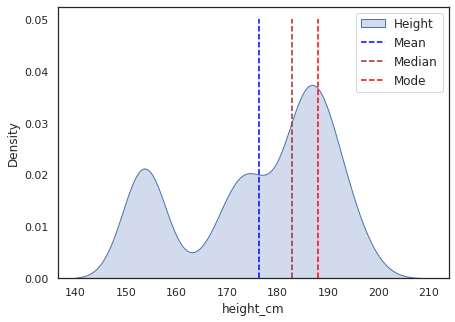

In [ ]:
# KDE Plot (Distribusi data) dari Height
plt.figure(figsize=(7,5))
sns.kdeplot(height_arr, shade=True)
plt.vlines(x=np.mean(height_arr), ymin=0, ymax=0.05, color='blue', linestyle='--')
plt.vlines(x=np.median(height_arr), ymin=0, ymax=0.05, color='brown', linestyle='--')
plt.vlines(x=scp.mode(height_arr)[0][0], ymin=0, ymax=0.05, color='red', linestyle='--')
plt.legend(['Height', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Terlihat bahwa distribusi bersifat skewed karena lebih berat di kanan. Berdasarkan visualisasi, median, mean, dan modus tidak selalu sama. Pada kasus ini, terlihat bahwa median dapat menjadi pengukuran yang paling tepat untuk menggambarkan central tendency dari data.

Selain itu, kita dapat mengecek nilai skewness dari atribut-atribut numerik dengan menggunakan fungsi `.skew()` berikut:

In [ ]:
# Mengambil hanya atribut float numerik
numeric_df = df.select_dtypes(include=['float64'])

# Mengecek nilai skewness dari data
numeric_df.skew()

height_cm    -0.585555
weight_kgs    0.129065
value_euro    1.791467
wage_euro     1.936579
dtype: float64

Interpretasi nilai *skewness*:
*   Jika nilainya positif maka right skewed (buntut kanan > buntut kiri)
*   Jika nilainya negatif maka left skewed (buntut kiri > buntut kanan)
*   Jika skewness = 0, data simetris

Dari hasil tersebut, didapati bahwa Height memiliki karakteristik left skewed dengan tingkat asimetris yang tidak terlalu tinggi. Sementara atribut numerik lain memiliki asimetris yang sedikit tinggi ke kanan.


Untuk membandingkan distribusi data A ke data B, kita dapat menggunakan overlapping Histogram atau KDE plot.

Misalkan kita ingin melihat perbandingan `height` pada pemain dari Jerman dan Spanyol.

In [ ]:
# Memisahkan dataset menjadi Pemain Jerman dan Spanyol
german = df[df['nationality'] == "Germany"]
spain = df[df['nationality'] == "Spain"]
# Mengambil tingginya
german_height = german['height_cm']
spain_height = spain['height_cm']

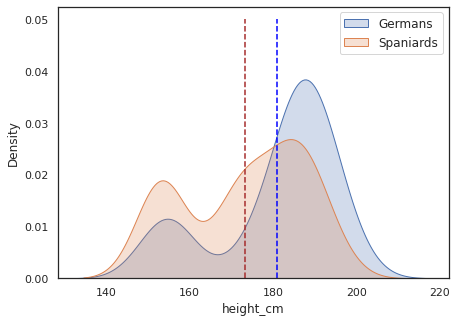

In [ ]:
# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(german_height, shade=True)
sns.kdeplot(spain_height, shade=True)
plt.legend(['Germans','Spaniards'], fontsize=12)
plt.vlines(x=german_height.mean(), ymin=0, ymax=0.05, color='blue', linestyle='--')
plt.vlines(x=spain_height.mean(), ymin=0, ymax=0.05, color='brown', linestyle='--')
plt.show()

## Correlation

Korelasi merupakan pengukuran dependensi antar atribut dalam data. Korelasi sering digunakan untuk mengukur apakah suatu atribut memiliki hubungan yang kuat secara linier atau tidak. 

Terdapat beberapa jenis korelasi yang dapat digunakan pada jenis data yang berbeda. ***Pearson correlation*** umum digunakan untuk mengukur korelasi pada atribut numerik.

In [ ]:
# Menampilkan nilai korelasi atribut numerik (dari koefisien Pearson)
df.corr(method='pearson')

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,weak_foot,skill_moves
age,1.000000,0.093050,0.122680,0.057981,-0.514883,-0.331843,-0.026614,-0.060821,-0.197142
height_cm,0.093050,1.000000,0.585882,0.108581,0.082354,-0.035059,0.014076,-0.217518,-0.505365
weight_kgs,0.122680,0.585882,1.000000,0.062644,0.040922,-0.092406,-0.036934,-0.239184,-0.567952
overall_rating,0.057981,0.108581,0.062644,1.000000,0.725385,0.848756,0.772821,0.084771,-0.001152
potential,-0.514883,0.082354,0.040922,0.725385,1.000000,0.804488,0.586464,0.082716,0.037869
value_euro,-0.331843,-0.035059,-0.092406,0.848756,0.804488,1.000000,0.752143,0.197931,0.230680
wage_euro,-0.026614,0.014076,-0.036934,0.772821,0.586464,0.752143,1.000000,0.142769,0.118581
weak_foot,-0.060821,-0.217518,-0.239184,0.084771,0.082716,0.197931,0.142769,1.000000,0.357830
skill_moves,-0.197142,-0.505365,-0.567952,-0.001152,0.037869,0.230680,0.118581,0.357830,1.000000


Kita sudah dapat melihat nilai korelasi pada matrix di atas. Akan tetapi, visualisasi dari matrix tersebut kurang enak untuk dilihat. Untuk itu, kita akan menggunakan visualisasi heatmap.

Text(0.5, 1.0, 'Correlation matrix')

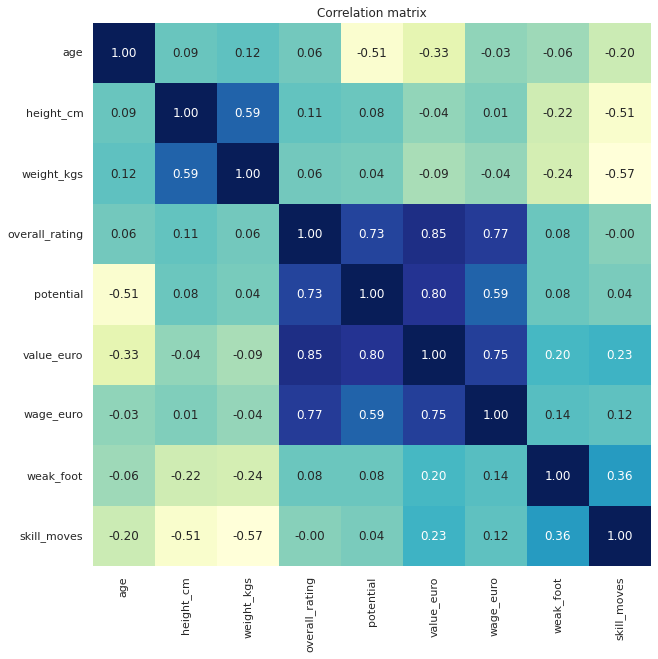

In [ ]:
# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10,10))

sns.heatmap(df.select_dtypes(np.number).corr(), 
        annot=True,
        cbar=False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=df.select_dtypes(np.number).columns,
        yticklabels=df.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

Dari heatmap diatas, kita bisa menentukan pasangan atribut apa saja yang memiliki relasi yang tinggi (warna biru gelap). Untuk membuktikan, dibawah terdapat 2 scatterplot yang menunjukkan korelasi dengan `Value Euro`, yakni
* `Overall Rating`: 0.85
* `Wage Euro`: 0.75

<AxesSubplot:xlabel='value_euro', ylabel='overall_rating'>

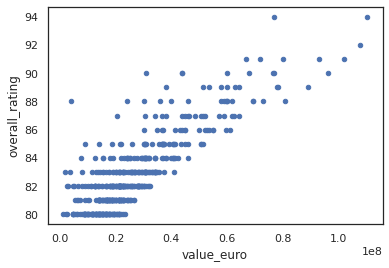

In [ ]:
# Membuat scatterplot untuk value_euro terhadap overall_rating
df.plot.scatter(x="value_euro", y="overall_rating", figsize=(6,4))

Dari visualisasi tersebut kita dapat melihat bahwa `Value Euro` berbanding lurus dengan `Overall Rating`. Semakin tinggi `Overall Rating`, maka `Value Euro` juga akan meningkat (tentu sangat masuk akal).

<AxesSubplot:xlabel='value_euro', ylabel='wage_euro'>

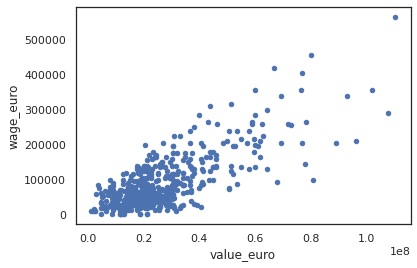

In [ ]:
# Membuat scatterplot untuk value_euro terhadap wage_euro
df.plot.scatter(x="value_euro", y="wage_euro", figsize=(6,4))

Seperti sebelumnya, dari visualisasi tersebut kita dapat melihat bahwa `Value Euro` berbanding lurus dengan `Wage Euro`. Semakin tinggi `Overall Rating`, maka `Value Euro` juga akan meningkat (tentu masuk akal juga, semakin berharga seorang pemain maka gajinya juga semakin besar).

## Data Visualization

In [ ]:
# Fungsi yang membuat plot untuk melihat distribusi frekuensi untuk satu kolom/atribut
def countplot(column, df):
    return sns.countplot(x=column, data=df)

<AxesSubplot:xlabel='preferred_foot', ylabel='count'>

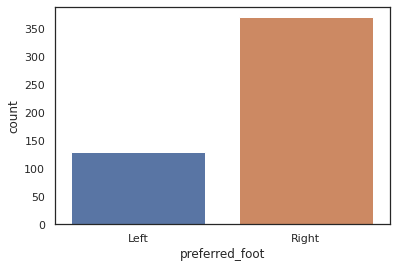

In [ ]:
# Memanggil fungsi untuk atribut preferred_foot
countplot('preferred_foot', df)

Sekilas dari countplot di atas, atribut `preferred_foot` memiliki data yang tidak seimbang, di mana lebih banyak pemain menggunakan kaki kanannya sebagai kaki bermain utamanya.

<AxesSubplot:xlabel='position', ylabel='count'>

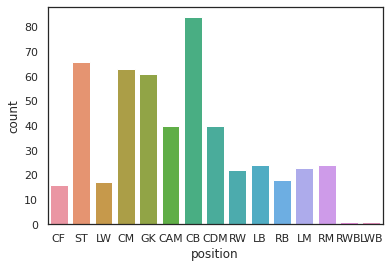

In [ ]:
# Memanggil fungsi untuk atribut position
countplot('position', df)

Sedangkan countplot di atas memberi tahu kita bahwa dari 500 pemain sepakbola terbaik menurut FIFA, kebanyakan adalah CB (Center Back), sedangkan RWB dan LWB paling sedikit.

<AxesSubplot:xlabel='position', ylabel='overall_rating'>

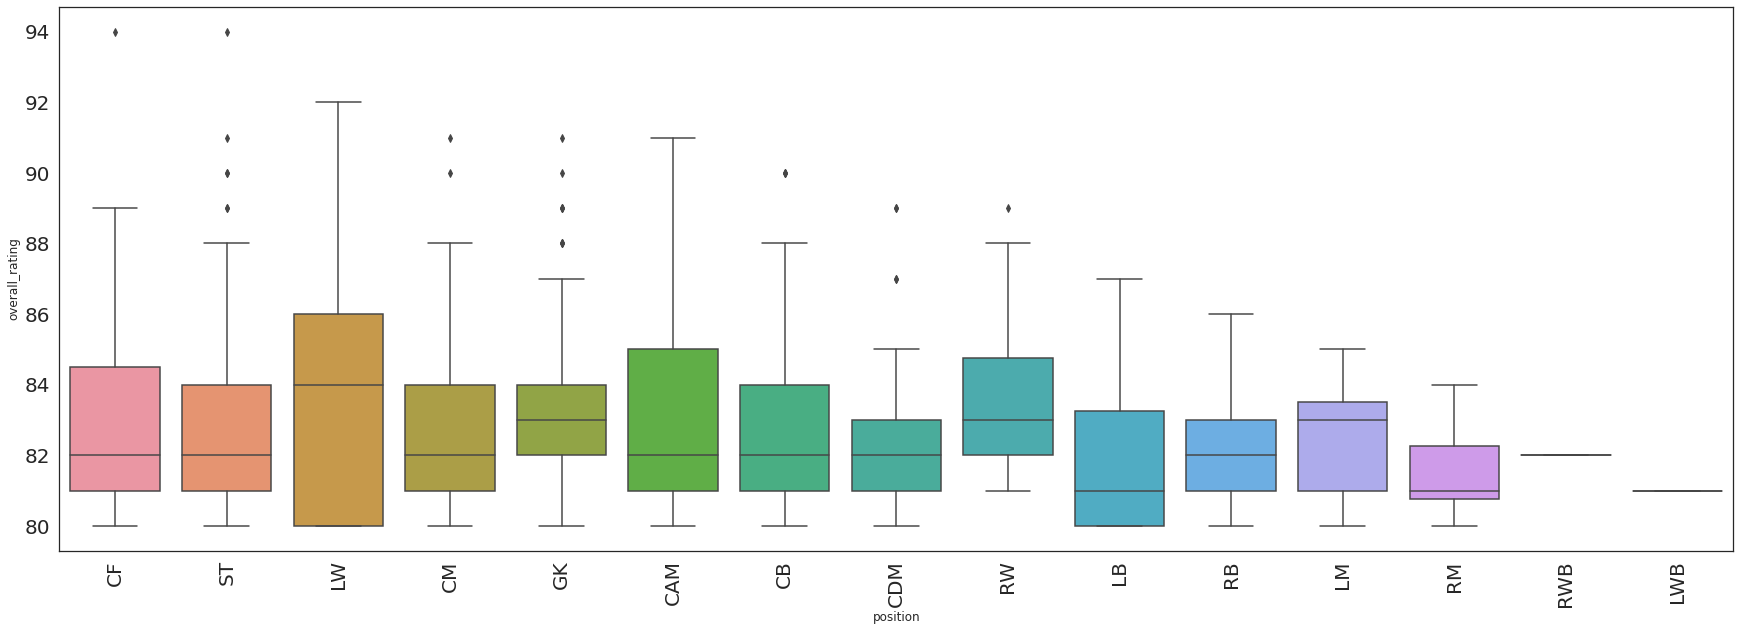

In [ ]:
# Menampilkan boxplot Position terhadap Overall Rating
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='position', y='overall_rating')

# Latihan Soal

### **SOAL 1: Descriptive Statistics**

(a) Tampilkan descriptive statistics dari atribut `Weight`, namun tambahkan range, Q1, Q2, dan Q3!

In [ ]:
weight = np.array(df['weight_kgs'])

mean = np.mean(weight)
median = np.median(weight)
mode = scp.mode(weight)[0][0]
variance = np.var(weight)
std = np.std(weight)
minimum = np.min(weight)
maximum = np.max(weight)
range = maximum - minimum
q1 = np.percentile(weight, 25)
q2 = median
q3 = np.percentile(weight, 75)

print(f'mean: {mean}')
print(f'median: {median}')
print(f'mode: {mode}')
print(f'variance: {variance}')
print(f'standard deviation: {std}')
print(f'minimum: {minimum}')
print(f'maximum: {maximum}')
print(f'range: {range}')
print(f'Q1: {q1}')
print(f'Q2: {q2}')
print(f'Q3: {q3}')

mean: 77.17
median: 77.1
mode: 69.9
variance: 60.912939999999985
standard deviation: 7.804674240479226
minimum: 59.0
maximum: 99.8
range: 40.8
Q1: 71.2
Q2: 77.1
Q3: 83.0


(b) Apa central tendency paling cocok untuk atribut `Weight`? Berikan alasan!

In [ ]:
skewness = df['weight_kgs'].skew()
skewness

0.12906451306653052

karena hasil skewness adalah positif dan cukup kecil (mendekati 0), maka persebaran data ini hampir simetris. maka central tendency yang paling cocok untuk atribut 'weight' adalah **mean**

### **SOAL 2: Data Visualization**

Untuk setiap sub-soal, pilih salah satu dari visualisasi berikut:
* Pie chart
* Bar chart
* Scatter plot
* Box plot
* Histogram
* KDE plot

Beberapa kasus terkadang memiliki lebih dari satu "jawaban yang tepat", karena ada banyak cara untuk visualisasi data. Pilihlah yang menurut Anda paling cocok berdasarkan kasus yang diberikan.

**Secara eksplisit, tulis chart apa yang Anda pilih dan alasannya.**

(a) Buatlah visualisasi untuk melihat jumlah rata-rata umur pemain di setiap negara. Apakah Jepang termasuk lima negara dengan rata-rata umur pemain tertua?

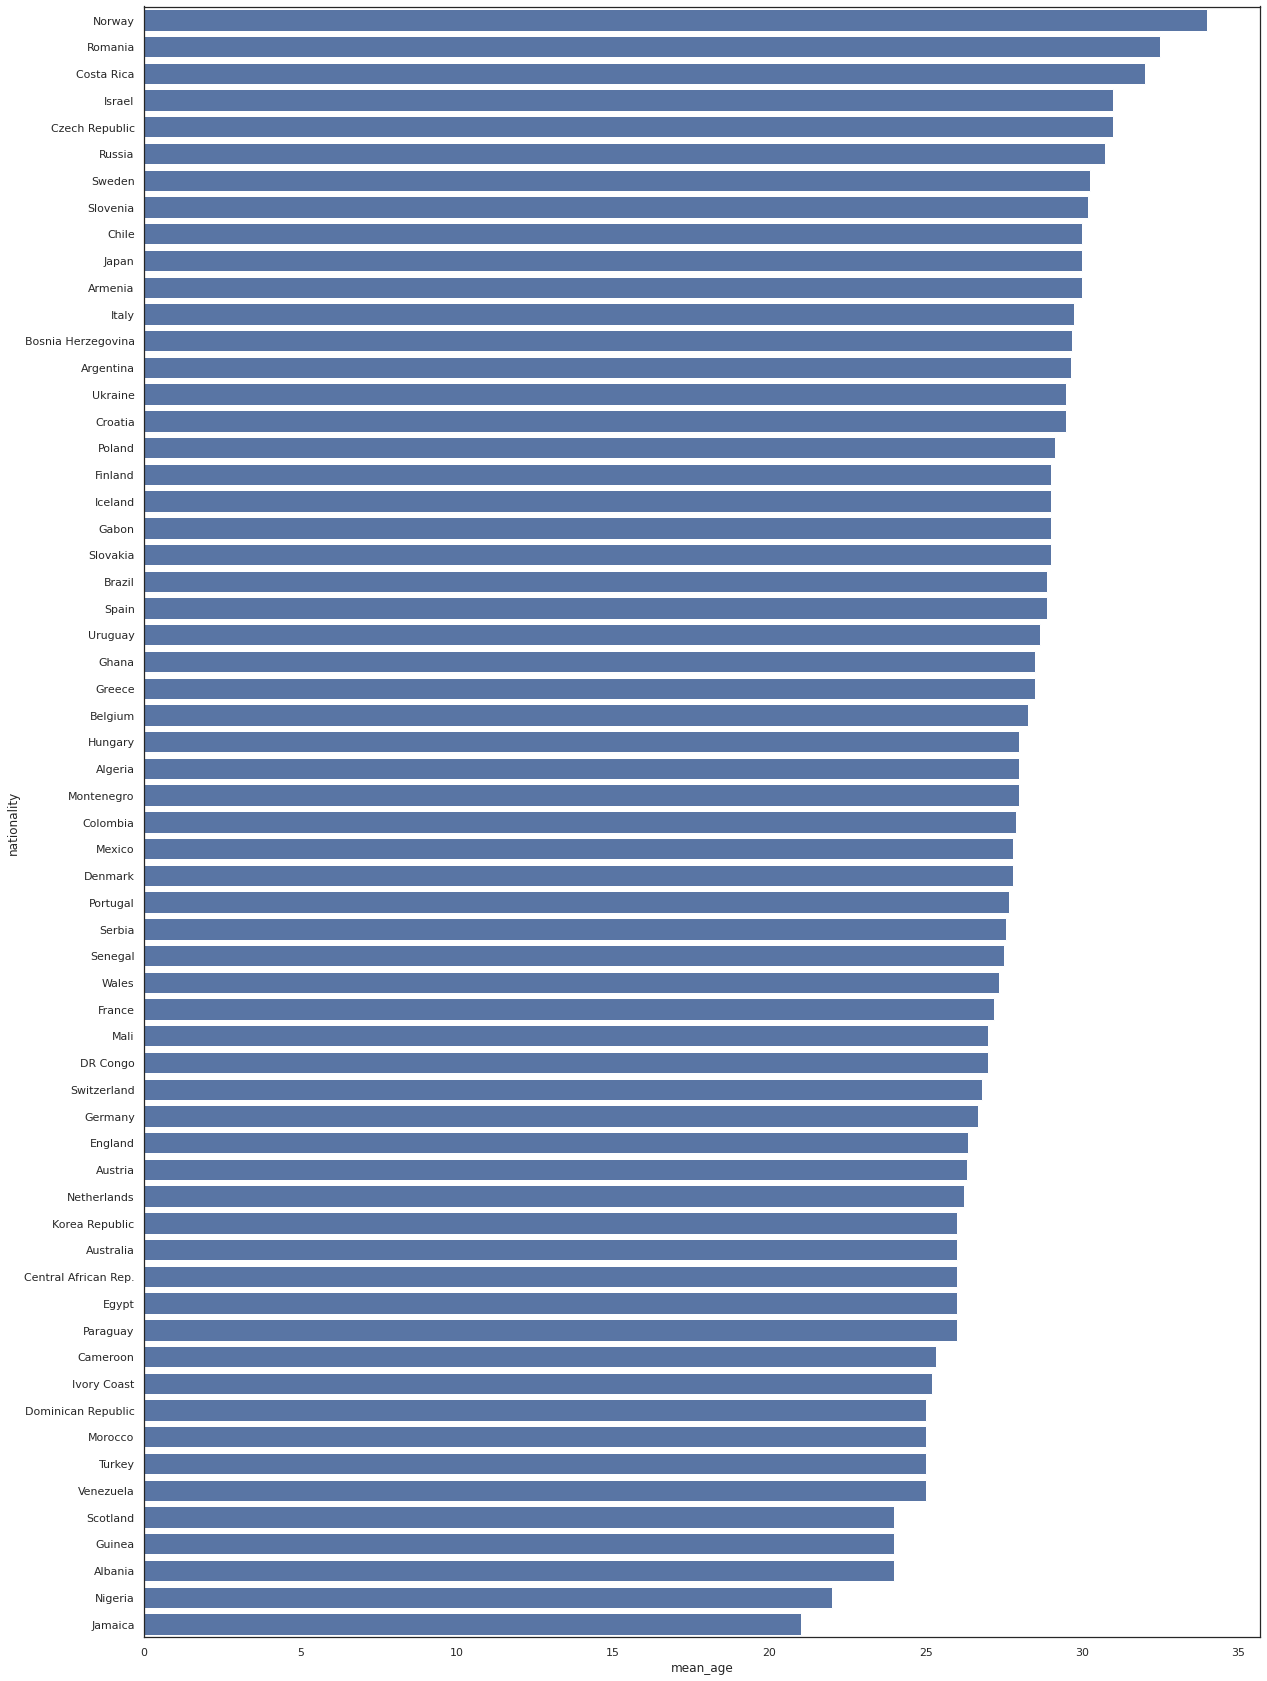

       nationality  mean_age
42          Norway      34.0
46         Romania      32.5
13      Costa Rica      32.0
30          Israel      31.0
15  Czech Republic      31.0


In [ ]:
sns.set_theme(style="white")
grouped = df.groupby(['nationality'])['age'].mean().reset_index(name='mean_age').sort_values('mean_age', ascending=False)

plt.figure(figsize=(20,30))
sns.barplot(x='mean_age', y='nationality', data=grouped, color='b')
plt.show()
print(grouped[:5])

1. saya memilih barchart karena data nationality-nya ada banyak, jadi visualisasi akan lebih mudah untuk dipahami menggunakan barplot dibandingkan jenis grafik yang lain.
2. Jepang tidak termasuk 5 negara dengan rata-rata umur pemain tertua

(b) Visualisasikan perbandingan distribusi `Value` antara pemain di klub Real Madrid dan klub Ajax. Cari juga total `Value` dari semua pemain di kedua klub tersebut, siapa yang lebih besar? Berikan analisis Anda dan mengapa perbedaan antara data dari masing-masing klub dapat terjadi?

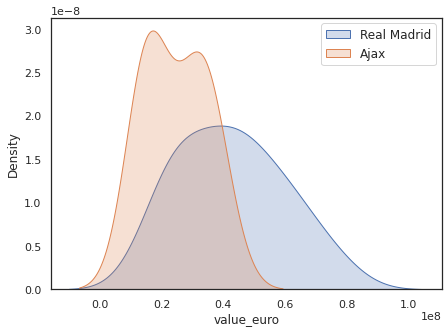

In [ ]:
real_madrid_value = df.loc[df['club_team'] == 'Real Madrid', 'value_euro']
ajax_value = df.loc[df['club_team'] == 'Ajax', 'value_euro']

plt.figure(figsize=(7,5))
sns.kdeplot(real_madrid_value, shade=True)
sns.kdeplot(ajax_value, shade=True)
plt.legend(['Real Madrid','Ajax'], fontsize=12)
plt.show()

In [ ]:
real_madrid_total_value = df.loc[df['club_team'] == 'Real Madrid', 'value_euro'].sum()
ajax_total_value = df.loc[df['club_team'] == 'Ajax', 'value_euro'].sum()
print(f'Real Madrid total value: {real_madrid_total_value} Euro')
print(f'Ajax total value: {ajax_total_value} Euro')
print(real_madrid_total_value > ajax_total_value)

Real Madrid total value: 766000000.0 Euro
Ajax total value: 147500000.0 Euro
True


1. untuk memvisualisasikan sebuah persebaran data numerik, menurut saya grafik yang paling tepat adalah menggunakan KDE plot. Hal ini disebabkan kita dapat melihat distribusi persebarannya (bahkan bentuk dari distribusinya).
2. analisis saya terbagi menjadi 2 bagian berikut:
- dari hasil visualisasi KDE plot dapat dilihat bahwa persebaran value pemain Real Madrid jauh lebih beragam (dan berada lebih kanan) daripada persebaran value pemain Ajax. Persebaran pemain ajax hanya dari 0 - 0.6 x 10^8 Euro, sedangkan persebaran pemain Real Madrid ada dari 0 - 1 x 10^8 Euro.
- di dunia nyata, sudah jelas bahwa Real Madrid adalah club yang jauh lebih kaya dibandingkan dengan Ajax.



(c) Buatlah sebuah visualisasi yang menggambarkan distribusi `Body Type` dari pemain yang mempunyai rating `Skill Moves` 4 atau 5. Berapa persentase dari pemain dengan `Body Type` *Lean* ?

([<matplotlib.patches.Wedge at 0x7fb43351b460>,
 [Text(1.068035996798755, 0.26324724033138536, 'Stocky'),
  Text(-0.2793480011780938, 1.0639382943751032, 'Lean'),
  Text(0.016613572121565095, -1.09987453339977, 'Normal')],
 [Text(0.5825650891629571, 0.14358940381711927, '8%'),
  Text(-0.15237163700623294, 0.5803299787500563, '43%'),
  Text(0.009061948429944596, -0.5999315636726017, '50%')])

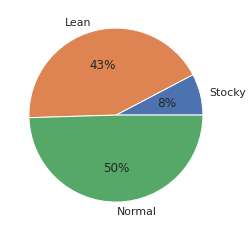

In [ ]:
new_df = df.loc[(df['skill_moves'] == 4) | (df['skill_moves'] == 5), ['body_type']]
data = [len(new_df.loc[new_df['body_type'] == 'Stocky', 'body_type']), len(new_df.loc[new_df['body_type'] == 'Lean', 'body_type']), len(new_df.loc[new_df['body_type'] == 'Normal', 'body_type'])]
keys = ['Stocky', 'Lean', 'Normal']
plt.pie(data, labels=keys, autopct='%.0f%%')

1. saya memilih piechart karena jenis body type hanya ada 3, sehingga untuk divisualisasikan dalam piechart itu mudah untuk dipahami dan diinterpretasikan berdasarkan luas pie dalam chart tersebut.
2. presentase pemain dengan body type Lean adalah 43%

(d) Buatlah visualisasi untuk melihat korelasi antara `potential` dan `Value Euro`. Berikat analisis dan pendapat Anda berdasarkan visualisasi yang Anda buat!

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='potential', ylabel='value_euro'>

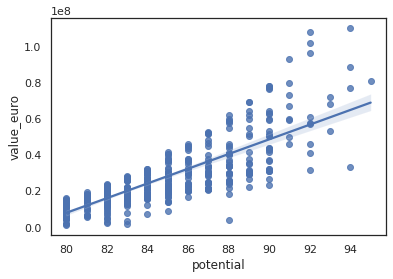

In [ ]:
sns.regplot(df['potential'], df['value_euro'])

1. saya memilih scatterplot karena untuk melihat korelasi antara dua variable, jenis chart yang paling tepat adalah scatterplot.
2. dari visualisasi tersebut dapat dilihat bahwa ada korelasi positif antara potential dengan value_euro. hal ini terlihat dari semakin besar nilai potential, semakin besar pula nilai value_euro

(e) Buatlah visualisasi untuk melihat apakah ada outliers di atribut `Overall Rating` untuk setiap negara. Apakah outlier yang terlihat pada visualisasi dapat dikatakan sebagai outlier yang valid? Berikan pendapat dan analisis Anda mengenai hal tersebut!

<AxesSubplot:xlabel='overall_rating', ylabel='nationality'>

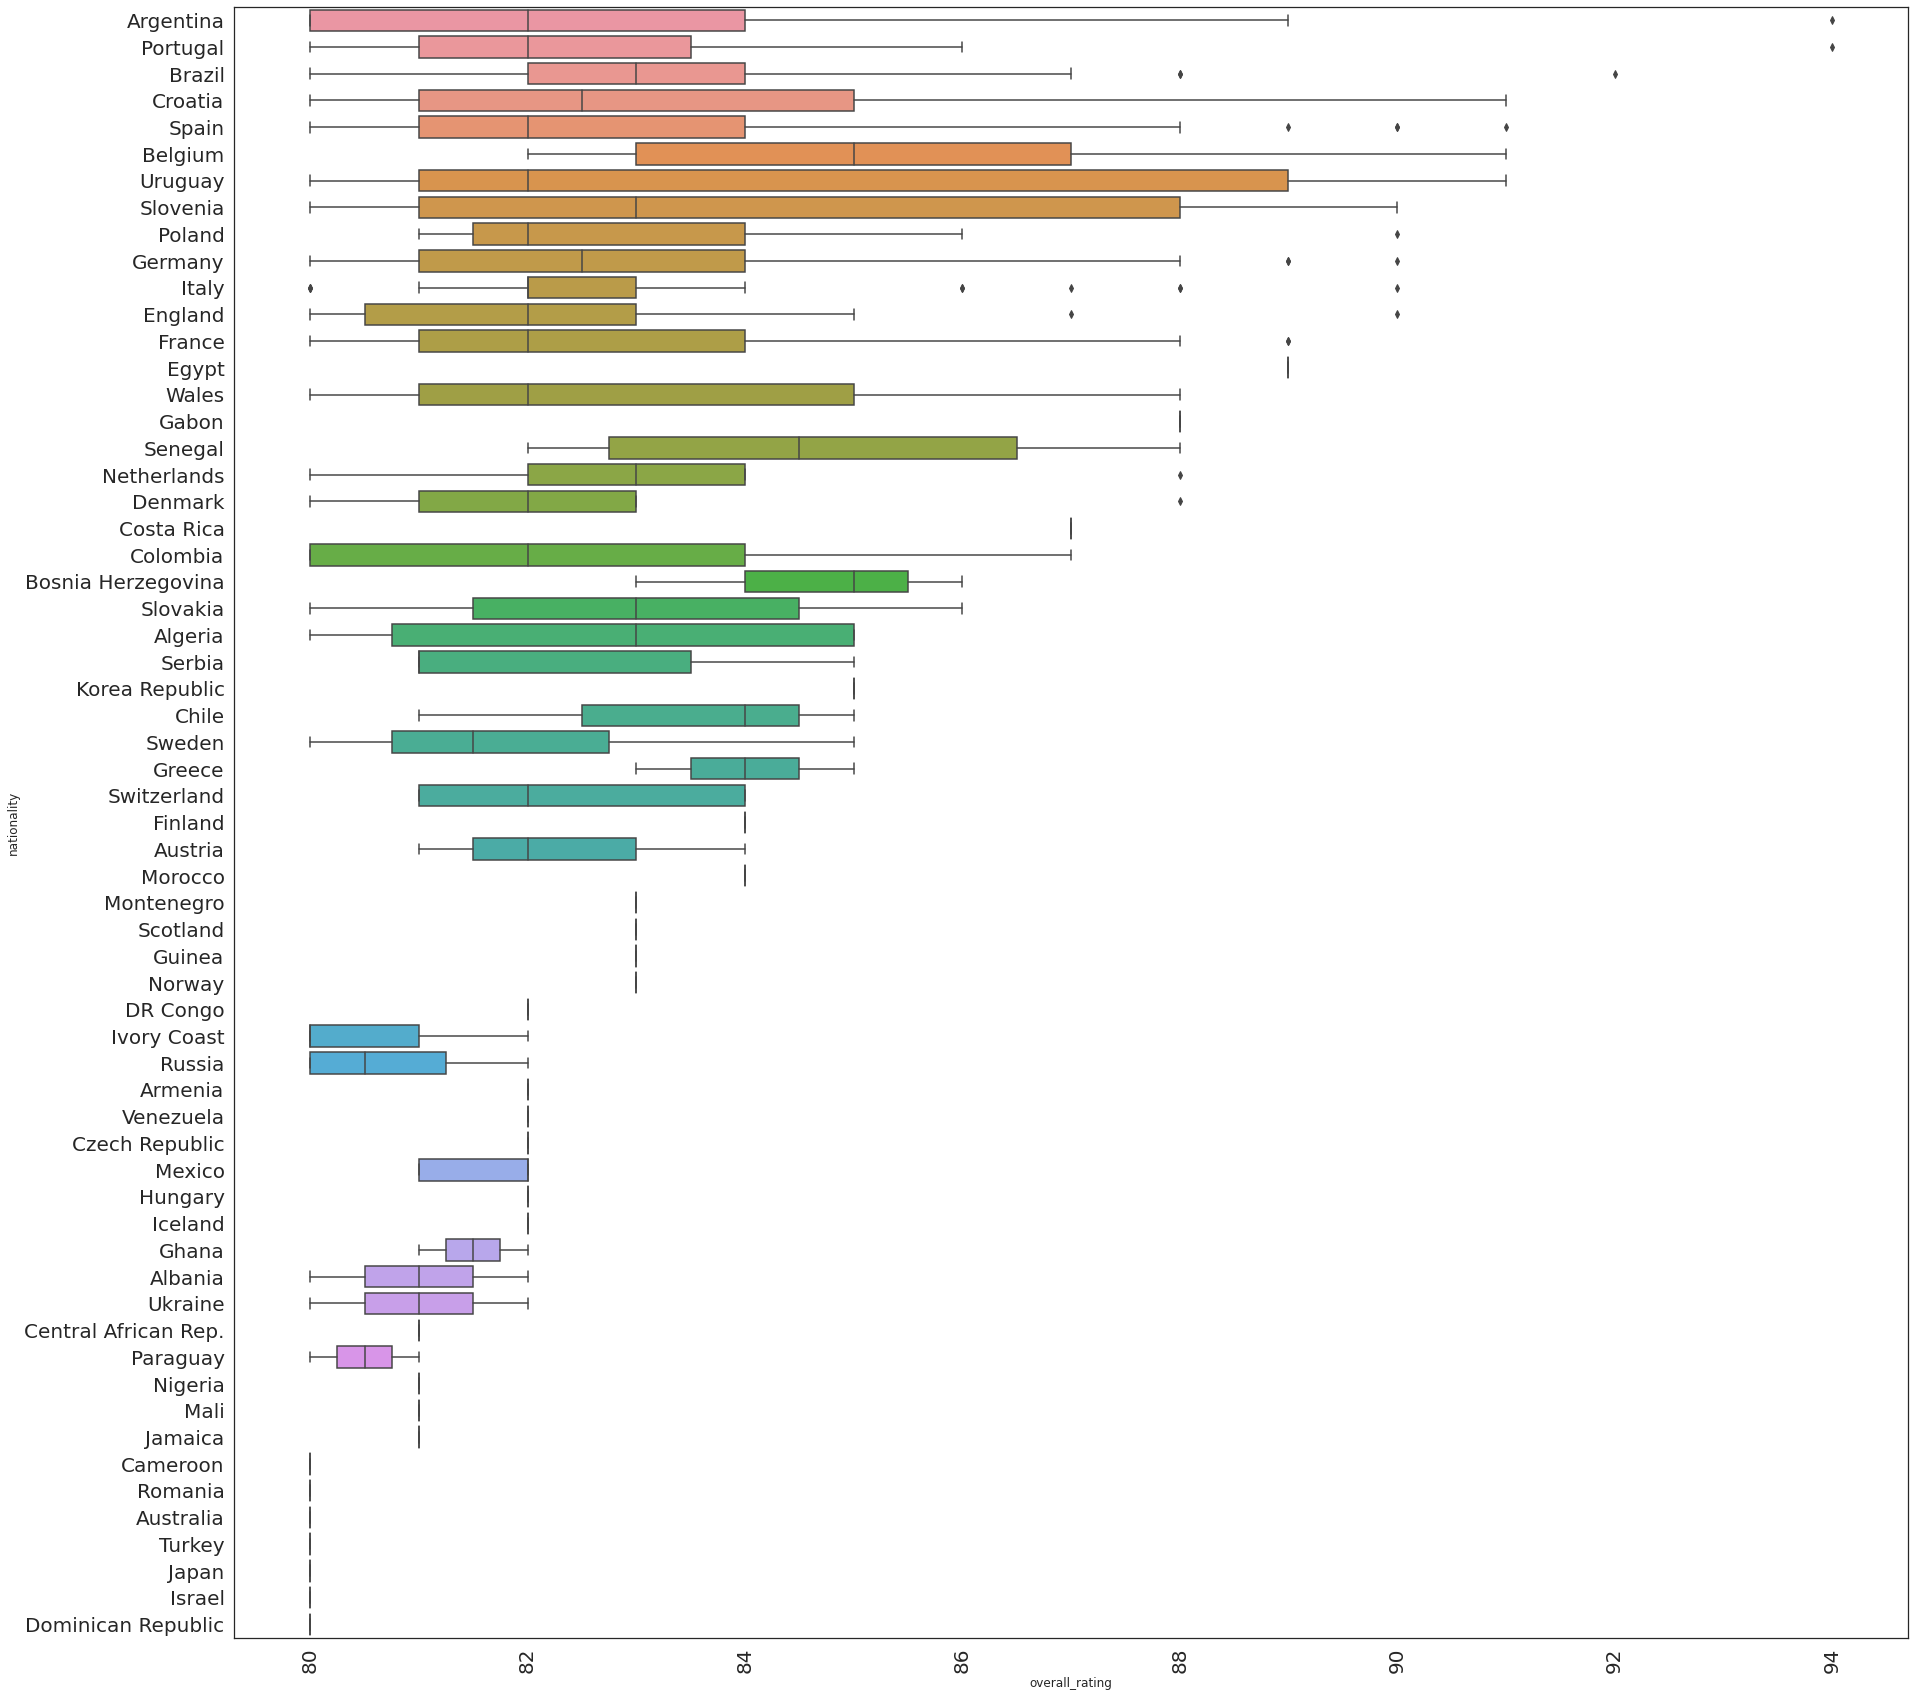

In [ ]:
overall_rating = df['overall_rating']
plt.figure(figsize=(30,30))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, y='nationality', x='overall_rating')

1. saya memilih boxplot karena untuk melihat ada atau tidaknya suatu outlier pada data dapat dilihat dengan jelas pada hasil visualisasi boxplot
2. menurut saya, berdasarkan penglihatan saya pada visualisasi ini terdapat outlier yang valid dan juga yang tidak valid. berikut penjelasannya:
- contoh outlier yang valid adalah pada outlier sebelah kanan batas garis boxplot pada negara Brazil. menurut saya, itu outlier yang valid karena batas atas dari boxplot adalah Q3 + (1.5 * IQR).

(f) Lihatlah perbandingan distribusi data antara tinggi pemain yang bermain sebagai *Striker* dan tinggi pemain yang bermain sebagai *Goal Keeper*. Berikan analisa Anda, mengapa distribusi seperti tersebut dapat terjadi?

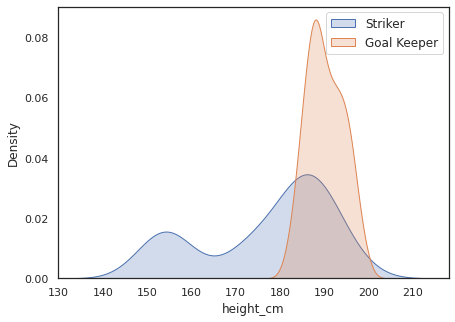

In [ ]:
df.head()
striker = df.loc[df['position'] == 'ST', 'height_cm']
gkeeper = df.loc[df['position'] == 'GK', 'height_cm']

plt.figure(figsize=(7,5))
sns.kdeplot(striker, shade=True)
sns.kdeplot(gkeeper, shade=True)
plt.legend(['Striker','Goal Keeper'], fontsize=12)
plt.show()

1. saya memilih KDE plot karena ini adalah visualisai yang mudah untuk dipahami untuk menggambarkan distribusi suatu data numerik.
2. dari visualisasi tersebut dapat dilihat bahwa mayoritas Goal Keeper memiliki tinggi badan yang tinggi (sekitar 180 hingga 200 cm). sedangkan, Striker memiliki tinggi badan yang beragam dan cukup merata (sekitar 140 hingga 210 cm). Menurut saya, hal ini disebabkan oleh:
- seorang Goal Keeper perlu memiliki tinggi badan yang tinggi karena ia harus menjaga gawang. sehingga tinggi badan merupakan hal yang penting
- berbeda dengan GK, tinggi badan bagi seorang Striker bukanlah hal yang paling krusial, melainkan skil menyerang lawan. hal ini lah yang menyebabkan distribusi tinggi badan Striker jauh lebih beragam dan merata dibandingkan Goal Keeper.

(g) Sebelumnya kita sudah menggunakan pearson correlation untuk mengukur korelasi antar atribut numerik. Namun sebenarnya pearson correlation hanya cocok untuk data numerik yang bertipe data rasio, sedangkan atribut `skill_moves` dan `weak_foot` merupakan data yang bertipe ordinal (Baca kembali *Levels of Measurement*). Apakah koefisien korelasi yang tepat untuk mengukur korelasi antar atribut ordinal? Buatlah visualisasi yang menggambarkan korelasi antara atribut `skill_moves` dan `weak_foot` menggunakan koefisien korelasi yang tepat, kemudian berikan analisis Anda mengenai visualisasi yang telah dibuat!

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


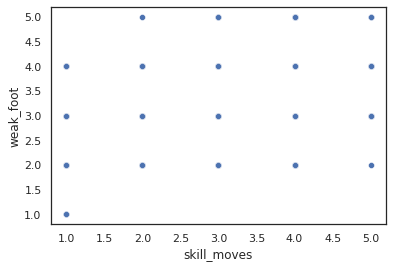

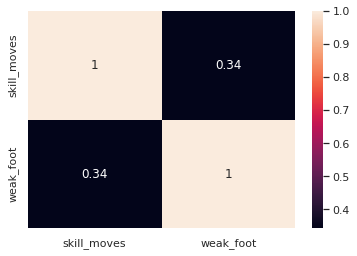

In [ ]:
skill_moves = df['skill_moves']
weak_foot = df['weak_foot']
data = pd.DataFrame({'skill_moves':skill_moves, 'weak_foot':weak_foot})

sns.scatterplot(skill_moves, weak_foot)
plt.show()
sns.heatmap(data.corr(method='spearman'), annot=True)
plt.show()

1. karena yang dicari adalah korelasi antar atribut ordinal, rumus yang tepat untuk digunakan adalah ***spearman rho***
2. saya memilih scatterplot karena ini adalah visualisasi paling mudah untuk dipahami untuk merepresentasikan hubungan dua buah variable. namun, karena ini adalah variable ordinal, maka tidak bisa digunakan scatterplot biasa (tapi saya juga tidak mengerti bagaimana cara menampilkan scatterplot menggunakan metode spearman rho). Jadi saya menggunakan heatmap
3. dari hasil heatmap dapat dilihat bahwa weak_foot dan skill_moves memiliki korelasi positif (berbanding lurus). semakin besar nilai weak_foot, maka semakin besar pula nilai skill_moves